# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Import dependencies

import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import json
import requests
import scipy.stats as st
import requests as req
import pandas as pd
from pprint import pprint

from citipy import citipy
    
# API Keys needed
from api_keys import weather_api_key
from api_keys import g_key

## Generate Cities List

In [2]:
# Number of random numbers to be generated
y = 1500

# For instance, latitude, or y, values are between -90 and +90
# Randmoly generate latitude coordinates. For Y numbers. 
city_data = pd.DataFrame()
city_data['random_latitude'] = [np.random.uniform(-90,90) for i in range (y)]

# For instance, longitude, or x, values are between -180 and +180
# Randomly generate langitude coordinates. For Y numbers. 
city_data['random_longitude'] = [np.random.uniform(-180,180) for i in range (y)]

# city_data.head()


In [3]:
closest_city = []
host_country = []
latitude = []
longitude = []

# Find the closest city
for index,row in city_data.iterrows():
    lat = row['random_latitude']
    long = row['random_longitude']
    city = citipy.nearest_city(lat, long).city_name
    country = citipy.nearest_city(lat, long).country_code
    
# Review and drop any duplicate cities due to random lat / long proximity.
    if city not in closest_city:
        closest_city.append(city)
        host_country.append(country)
        latitude.append(lat)
        longitude.append(long)

# Creating dataframe and formatting
closest_city = [x.upper() for x in closest_city]
host_country = [x.upper() for x in host_country]
summary_df=pd.DataFrame({"Random Latitude": latitude, "Random Longitude": longitude, "Closest City": closest_city, 
                         "Country": host_country})
summary_df.head()

,Random Latitude,Random Longitude,Closest City,Country
0,-25.648883,-69.687002,DIEGO DE ALMAGRO,CL
1,72.295270,-40.822843,TASIILAQ,GL
2,67.537719,-22.413236,BOLUNGARVIK,IS
3,-28.467625,-90.121893,COQUIMBO,CL
4,20.427499,133.143435,NISHIHARA,JP


In [4]:
 # Confirm the number of cities is greater than 500
len(closest_city)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [6]:
# Create lists for different response information
weather_city = []
weather_country =[]
weather_date=[]
weather_country = []
weather_latitude = []
weather_longitude = []
weather_temperature_F = []
weather_humidity_percent = []
weather_cloudiness_percent = []
weather_wind_speed_mph = []

x = 1

# Build query for different cities. 

print(' ')
print('Start of Records')
print(' ')

for city in closest_city:
        query_url = url + "appid=" + weather_api_key + "&q=" + city +"&units=" + units 
        print(f'Retrieving information for {city}. City number {x} of {len(closest_city)}.')
        print(query_url)
        
# Get Weather Data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()

# Collect the requested information
        try:
            weather_city.append(weather_json['name'])
            weather_country.append(weather_json['sys']['country'])
            weather_date.append(weather_json['dt'])
            weather_latitude.append(weather_json['coord']['lat'])
            weather_longitude.append(weather_json['coord']['lon'])
            weather_temperature_F.append(weather_json['main']['temp_max'])
            weather_humidity_percent.append(weather_json['main']['humidity'])
            weather_cloudiness_percent.append(weather_json['clouds']['all'])
            weather_wind_speed_mph.append(weather_json['wind']['speed'])

            x = x + 1
            print(' ')

# Capture when city is not found
        except:
            print(f'{city} was not Found')
            print(' ')
            x = x + 1 
            print(' ')

# Timer to pause for a second after each record - not too exceed 60 API calls per minute limit
        time.sleep(1)
            
print(' ')
print('End of Records')
print(' ')

 
Start of Records
 
Retrieving information for DIEGO DE ALMAGRO. City number 1 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=DIEGO DE ALMAGRO&units=imperial
 
Retrieving information for TASIILAQ. City number 2 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=TASIILAQ&units=imperial
 
Retrieving information for BOLUNGARVIK. City number 3 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=BOLUNGARVIK&units=imperial
BOLUNGARVIK was not Found
 
 
Retrieving information for COQUIMBO. City number 4 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=COQUIMBO&units=imperial
 
Retrieving information for NISHIHARA. City number 5 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=NISHIHARA&units=imperial
 
Retrieving information for CHOKURDAKH. City number 6 of 597.
h

 
Retrieving information for TAOLANARO. City number 48 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=TAOLANARO&units=imperial
TAOLANARO was not Found
 
 
Retrieving information for MANICORE. City number 49 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=MANICORE&units=imperial
 
Retrieving information for HAIBOWAN. City number 50 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=HAIBOWAN&units=imperial
HAIBOWAN was not Found
 
 
Retrieving information for BILMA. City number 51 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=BILMA&units=imperial
 
Retrieving information for VILHENA. City number 52 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=VILHENA&units=imperial
 
Retrieving information for VILA VELHA. City number 53 of 597.
http://api.openweathe

 
Retrieving information for CASTRO. City number 95 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=CASTRO&units=imperial
 
Retrieving information for YELLOWKNIFE. City number 96 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=YELLOWKNIFE&units=imperial
 
Retrieving information for BONAVISTA. City number 97 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=BONAVISTA&units=imperial
 
Retrieving information for SAINT-PIERRE. City number 98 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=SAINT-PIERRE&units=imperial
 
Retrieving information for NEW NORFOLK. City number 99 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=NEW NORFOLK&units=imperial
 
Retrieving information for BARENTSBURG. City number 100 of 597.
http://api.openweathermap.org/data/2.5/weather

 
Retrieving information for RIBEIRA GRANDE. City number 141 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=RIBEIRA GRANDE&units=imperial
 
Retrieving information for PROVIDENIYA. City number 142 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=PROVIDENIYA&units=imperial
 
Retrieving information for CHULYM. City number 143 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=CHULYM&units=imperial
 
Retrieving information for OUAHIGOUYA. City number 144 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=OUAHIGOUYA&units=imperial
 
Retrieving information for PORT ELIZABETH. City number 145 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=PORT ELIZABETH&units=imperial
 
Retrieving information for SITKA. City number 146 of 597.
http://api.openweathermap.org/data/

 
Retrieving information for FORT SAINT JOHN. City number 187 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=FORT SAINT JOHN&units=imperial
FORT SAINT JOHN was not Found
 
 
Retrieving information for TUAL. City number 188 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=TUAL&units=imperial
 
Retrieving information for ROALD. City number 189 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=ROALD&units=imperial
 
Retrieving information for DURBAN. City number 190 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=DURBAN&units=imperial
 
Retrieving information for LAUNCESTON. City number 191 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=LAUNCESTON&units=imperial
 
Retrieving information for CLYDE RIVER. City number 192 of 597.
http://api.openweathermap.o

 
Retrieving information for BUALA. City number 233 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=BUALA&units=imperial
 
Retrieving information for NIZHNEYANSK. City number 234 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=NIZHNEYANSK&units=imperial
NIZHNEYANSK was not Found
 
 
Retrieving information for AVERA. City number 235 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=AVERA&units=imperial
 
Retrieving information for GRAND RIVER SOUTH EAST. City number 236 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=GRAND RIVER SOUTH EAST&units=imperial
GRAND RIVER SOUTH EAST was not Found
 
 
Retrieving information for EL ALTO. City number 237 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=EL ALTO&units=imperial
 
Retrieving information for KAVIENG. 

 
Retrieving information for KITGUM. City number 280 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=KITGUM&units=imperial
 
Retrieving information for NORTH BEND. City number 281 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=NORTH BEND&units=imperial
 
Retrieving information for PALM VALLEY. City number 282 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=PALM VALLEY&units=imperial
 
Retrieving information for WESTPORT. City number 283 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=WESTPORT&units=imperial
 
Retrieving information for EL COPE. City number 284 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=EL COPE&units=imperial
 
Retrieving information for KONGWA. City number 285 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e0

 
Retrieving information for DUNEDIN. City number 327 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=DUNEDIN&units=imperial
 
Retrieving information for ATAR. City number 328 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=ATAR&units=imperial
 
Retrieving information for MOCAMBIQUE. City number 329 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=MOCAMBIQUE&units=imperial
MOCAMBIQUE was not Found
 
 
Retrieving information for STARAYA POLTAVKA. City number 330 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=STARAYA POLTAVKA&units=imperial
 
Retrieving information for PORT VICTORIA. City number 331 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=PORT VICTORIA&units=imperial
 
Retrieving information for BROOME. City number 332 of 597.
http://api.openwe

 
Retrieving information for CAY. City number 374 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=CAY&units=imperial
 
Retrieving information for RUATORIA. City number 375 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=RUATORIA&units=imperial
RUATORIA was not Found
 
 
Retrieving information for PANABA. City number 376 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=PANABA&units=imperial
 
Retrieving information for BAGHMARA. City number 377 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=BAGHMARA&units=imperial
 
Retrieving information for CANTON. City number 378 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=CANTON&units=imperial
 
Retrieving information for AWJILAH. City number 379 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8

Retrieving information for TUBAY. City number 421 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=TUBAY&units=imperial
 
Retrieving information for UPPSALA. City number 422 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=UPPSALA&units=imperial
 
Retrieving information for IMPFONDO. City number 423 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=IMPFONDO&units=imperial
 
Retrieving information for VILA FRANCA DO CAMPO. City number 424 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=VILA FRANCA DO CAMPO&units=imperial
 
Retrieving information for ANTA. City number 425 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=ANTA&units=imperial
 
Retrieving information for ANTALAHA. City number 426 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8

Retrieving information for RIO GALLEGOS. City number 468 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=RIO GALLEGOS&units=imperial
 
Retrieving information for NARSAQ. City number 469 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=NARSAQ&units=imperial
 
Retrieving information for SAYYAN. City number 470 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=SAYYAN&units=imperial
 
Retrieving information for HUNTINGTON. City number 471 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=HUNTINGTON&units=imperial
 
Retrieving information for CHERNYSHEVSKIY. City number 472 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=CHERNYSHEVSKIY&units=imperial
 
Retrieving information for JAGATSINGHAPUR. City number 473 of 597.
http://api.openweathermap.org/data/2.5/wea

Retrieving information for MAHIBADHOO. City number 515 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=MAHIBADHOO&units=imperial
 
Retrieving information for KARAUZYAK. City number 516 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=KARAUZYAK&units=imperial
KARAUZYAK was not Found
 
 
Retrieving information for FLIN FLON. City number 517 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=FLIN FLON&units=imperial
 
Retrieving information for KPANDAE. City number 518 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=KPANDAE&units=imperial
 
Retrieving information for LIVERPOOL. City number 519 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=LIVERPOOL&units=imperial
 
Retrieving information for HAMILTON. City number 520 of 597.
http://api.openweathermap.org/

Retrieving information for KORLA. City number 561 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=KORLA&units=imperial
 
Retrieving information for PHUKET. City number 562 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=PHUKET&units=imperial
 
Retrieving information for ULAGAN. City number 563 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=ULAGAN&units=imperial
 
Retrieving information for VESTBYGDA. City number 564 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=VESTBYGDA&units=imperial
VESTBYGDA was not Found
 
 
Retrieving information for BENGKULU. City number 565 of 597.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=BENGKULU&units=imperial
 
Retrieving information for PANJAB. City number 566 of 597.
http://api.openweathermap.org/data/2.5/weather?appid

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Create DataFrame.

city_weather = pd.DataFrame({"City": weather_city, "Latitude": weather_latitude, "Longitude": weather_longitude,
                             "Max Temperature (F)": weather_temperature_F, "Humidity (%)": weather_humidity_percent,
                             "Cloudiness": weather_cloudiness_percent, "Wind Speed": weather_wind_speed_mph, 
                            "Country": weather_country, "Date":weather_date})
city_weather.head(25)

,City,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness,Wind Speed,Country,Date
0,Diego de Almagro,-26.37,-70.05,75.42,26,0,10.27,CL,1599855911
1,Tasiilaq,65.61,-37.64,35.60,80,100,2.24,GL,1599855912
2,Coquimbo,-29.95,-71.34,59.00,72,3,11.41,CL,1599855915
3,Nishihara,26.18,127.76,80.60,88,20,12.75,JP,1599855916
4,Chokurdakh,70.63,147.92,42.03,75,0,7.00,RU,1599855917
5,Rikitea,-23.12,-134.97,73.58,87,77,10.07,PF,1599855918
6,Osmanabad,18.17,76.05,75.15,89,100,7.02,IN,1599855920
7,Zharkent,44.16,80.00,57.87,35,3,3.89,KZ,1599855921
8,Ponta do Sol,32.67,-17.10,73.40,64,40,10.29,PT,1599855427
9,Kapaa,22.08,-159.32,84.00,69,40,14.99,US,1599855923


In [8]:
# Check to make sure each column is complete
city_weather.count()

City                   552
Latitude               552
Longitude              552
Max Temperature (F)    552
Humidity (%)           552
Cloudiness             552
Wind Speed             552
Country                552
Date                   552
dtype: int64

In [9]:
# Create a CSV File
city_weather.to_csv("City_Weather_Dataframe.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

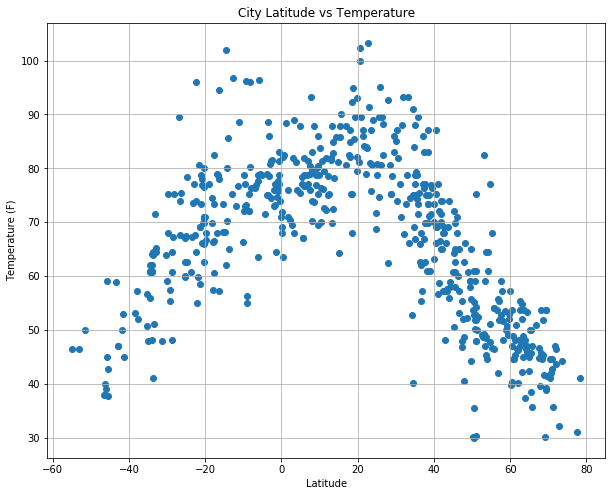

In [10]:
# Generate scatter plot
plt.figure(figsize=(10,8))
plt.scatter(city_weather['Latitude'], city_weather['Max Temperature (F)'])
plt.title("City Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)
plt.show
plt.savefig('Latitude_Temperature.png', bbox_inches='tight')


## Latitude vs. Humidity Plot

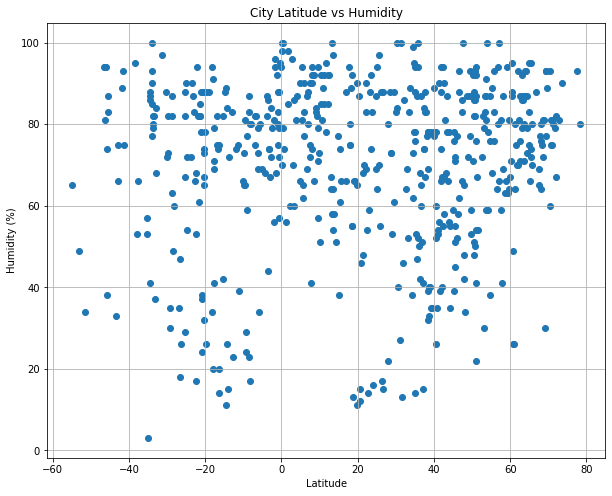

In [11]:
# Generate scatter plot
plt.figure(figsize=(10,8))
plt.scatter(city_weather['Latitude'], city_weather['Humidity (%)'])
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.show
plt.savefig('Latitude_Humidity.png', bbox_inches='tight')


## Latitude vs. Cloudiness Plot

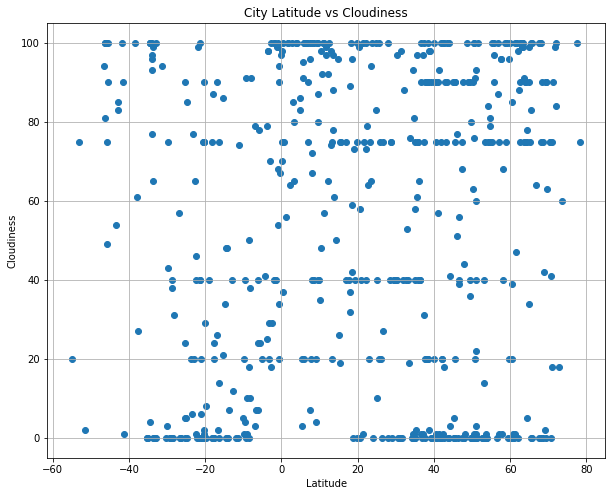

In [12]:
# Generate scatter plot
plt.figure(figsize=(10,8))
plt.scatter(city_weather['Latitude'], city_weather['Cloudiness'])
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
plt.show
plt.savefig('Latitude_Cloudiness.png', bbox_inches='tight')

## Latitude vs. Wind Speed Plot

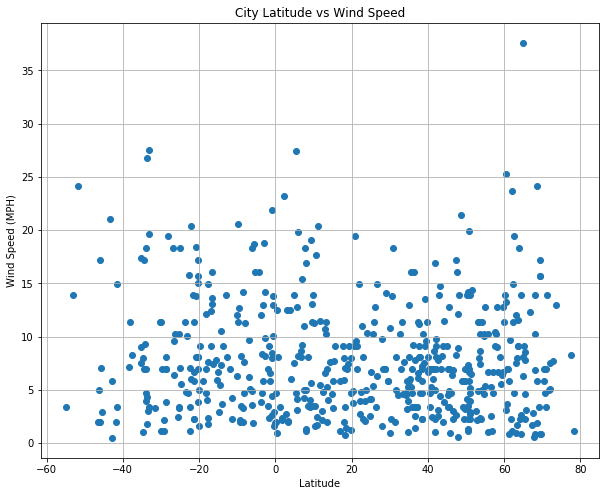

In [13]:
# Generate scatter plot
plt.figure(figsize=(10,8))
plt.scatter(city_weather['Latitude'], city_weather['Wind Speed'])
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid(True)
plt.show
plt.savefig('Latitude_WindSpeed.png', bbox_inches='tight')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [18]:
# Northern Hemisphere 
# Data for X-Axis (Latitude)
# Northern hemisphere greater than or equal to 0 degrees. Southern hemisphere less than 0 degrees.
latitude_north_df = city_weather[(city_weather["Latitude"]>=0)]
latitude_north_df.head()

,City,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness,Wind Speed,Country,Date
1,Tasiilaq,65.61,-37.64,35.60,80,100,2.24,GL,1599855912
3,Nishihara,26.18,127.76,80.60,88,20,12.75,JP,1599855916
4,Chokurdakh,70.63,147.92,42.03,75,0,7.00,RU,1599855917
6,Osmanabad,18.17,76.05,75.15,89,100,7.02,IN,1599855920
7,Zharkent,44.16,80.00,57.87,35,3,3.89,KZ,1599855921


The r-squared is: 0.633


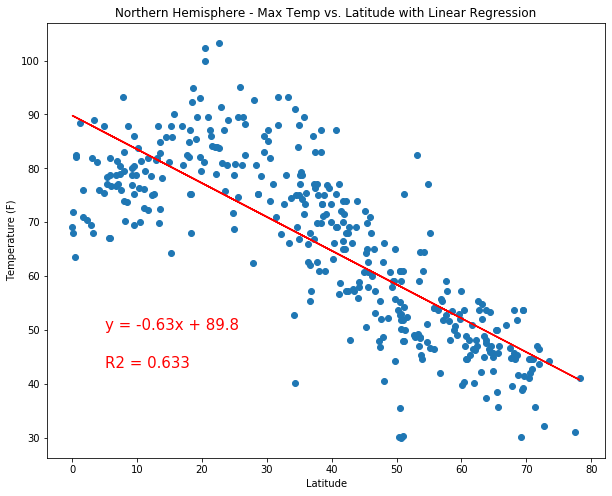

The correlation between Latitude and Temperature is: -0.795


In [27]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

# Data for X-Axis (latitude)
northern_latitude_axis = latitude_north_df.groupby(latitude_north_df["City"])["Latitude"].mean()
northern_latitude_axis

# Data for Y-axis (Max Temp)
northern_temperature_axis = latitude_north_df.groupby(latitude_north_df["City"])["Max Temperature (F)"].mean()
northern_temperature_axis

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = st.linregress(northern_latitude_axis, nothern_temperature_axis)

# Calculate the predictions for each value of x (latitude)
regression_values = nothern_latitude_axis * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot observations
plt.figure(figsize=(10,8))
plt.scatter(northern_latitude_axis, northern_temperature_axis)

# Plot the regression line
plt.plot(northern_latitude_axis, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (5, 50), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue**2,3)}", (5, 43), fontsize=15, color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude with Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

# Calculate the correlation coefficient
correlation = round(st.pearsonr(northern_latitude_axis, northern_temperature_axis)[0],3)
print(f"The correlation between Latitude and Temperature is: {correlation}")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [46]:
# Southern Hemisphere
# Northern hemisphere greater than or equal to 0 degrees. Southern hemisphere less than 0 degrees.
latitude_south_df = city_weather[(city_weather["Latitude"]<0)]
latitude_south_df.head()


,City,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness,Wind Speed,Country,Date
0,Diego de Almagro,-26.37,-70.05,75.42,26,0,10.27,CL,1599855911
2,Coquimbo,-29.95,-71.34,59.00,72,3,11.41,CL,1599855915
5,Rikitea,-23.12,-134.97,73.58,87,77,10.07,PF,1599855918
10,Ushuaia,-54.80,-68.30,46.40,65,20,3.36,AR,1599855645
11,Hermanus,-34.42,19.23,62.01,86,100,7.00,ZA,1599855926


The r-squared is: 0.538


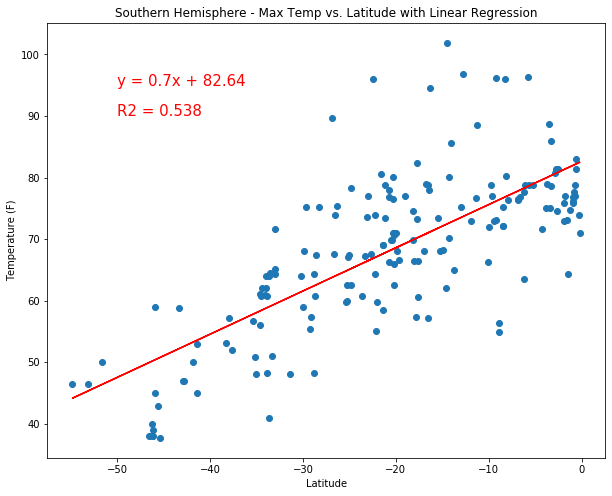

The correlation between Latitude and Temperature is: 0.734


In [47]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

# Data for X-Axis (latitude)
southern_latitude_axis = latitude_south_df.groupby(latitude_south_df["City"])["Latitude"].mean()
southern_latitude_axis

# Data for Y-axis (Max Temp)
southern_temperature_axis = latitude_south_df.groupby(latitude_south_df["City"])["Max Temperature (F)"].mean()
southern_temperature_axis

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = st.linregress(southern_latitude_axis, southern_temperature_axis)

# Calculate the predictions for each value of x (latitude)
regression_values = southern_latitude_axis * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot observations
plt.figure(figsize=(10,8))
plt.scatter(southern_latitude_axis, southern_temperature_axis)

# Plot the regression line
plt.plot(southern_latitude_axis, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (-50, 95), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue**2,3)}", (-50, 90), fontsize=15, color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude with Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

# Calculate the correlation coefficient
correlation = round(st.pearsonr(southern_latitude_axis, southern_temperature_axis)[0],3)
print(f"The correlation between Latitude and Temperature is: {correlation}")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.001


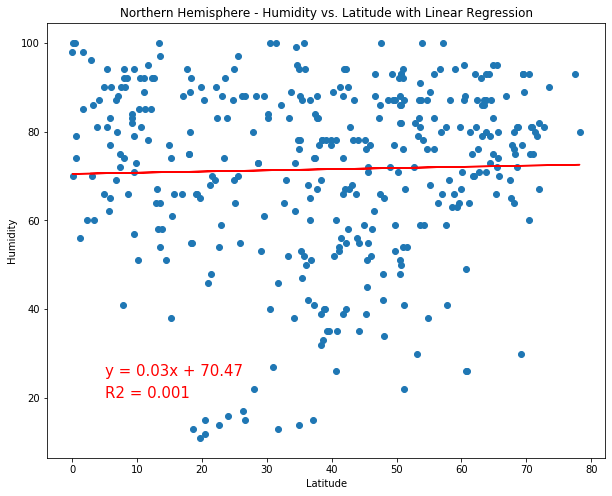

The correlation between Latitude and Humidity is: 0.027


In [48]:
# Northern Hemisphere - Humidity vs. Latitude Linear Regression

# Data for X-Axis (latitude)
northern_latitude_axis = latitude_north_df.groupby(latitude_north_df["City"])["Latitude"].mean()
northern_latitude_axis

# Data for Y-axis (Humidity)
northern_humidity_axis = latitude_north_df.groupby(latitude_north_df["City"])["Humidity (%)"].mean()
northern_humidity_axis

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = st.linregress(northern_latitude_axis, northern_humidity_axis)

# Calculate the predictions for each value of x (latitude)
regression_values = nothern_latitude_axis * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot observations
plt.figure(figsize=(10,8))
plt.scatter(northern_latitude_axis, northern_humidity_axis)

# Plot the regression line
plt.plot(northern_latitude_axis, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (5, 25), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue**2,3)}", (5, 20), fontsize=15, color="red")
plt.title("Northern Hemisphere - Humidity vs. Latitude with Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

# Calculate the correlation coefficient
correlation = round(st.pearsonr(northern_latitude_axis, northern_humidity_axis)[0],3)
print(f"The correlation between Latitude and Humidity is: {correlation}")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0


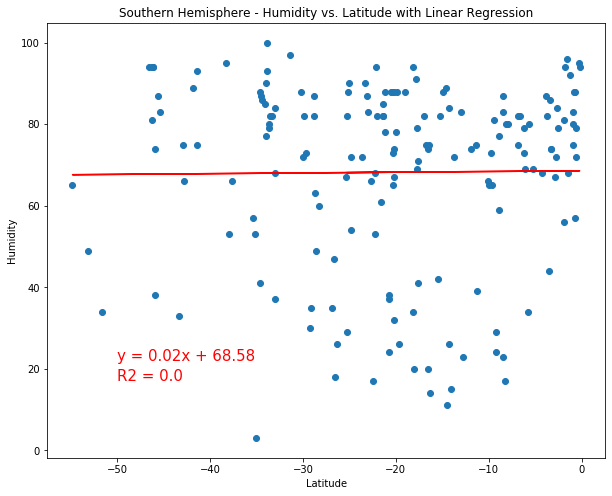

The correlation between Latitude and Humidity is: 0.01


In [49]:
# Southern Hemisphere - Humidity vs. Latitude Linear Regression

# Data for X-Axis (latitude)
southern_latitude_axis = latitude_south_df.groupby(latitude_south_df["City"])["Latitude"].mean()
southern_latitude_axis

# Data for Y-axis (Humidity)
southern_humidity_axis = latitude_south_df.groupby(latitude_south_df["City"])["Humidity (%)"].mean()
southern_humidity_axis

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = st.linregress(southern_latitude_axis, southern_humidity_axis)

# Calculate the predictions for each value of x (latitude)
regression_values = southern_latitude_axis * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot observations
plt.figure(figsize=(10,8))
plt.scatter(southern_latitude_axis, southern_humidity_axis)

# Plot the regression line
plt.plot(southern_latitude_axis, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (-50, 22), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue**2,3)}", (-50, 17), fontsize=15, color="red")
plt.title("Southern Hemisphere - Humidity vs. Latitude with Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

# Calculate the correlation coefficient
correlation = round(st.pearsonr(southern_latitude_axis, southern_humidity_axis)[0],3)
print(f"The correlation between Latitude and Humidity is: {correlation}")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.01


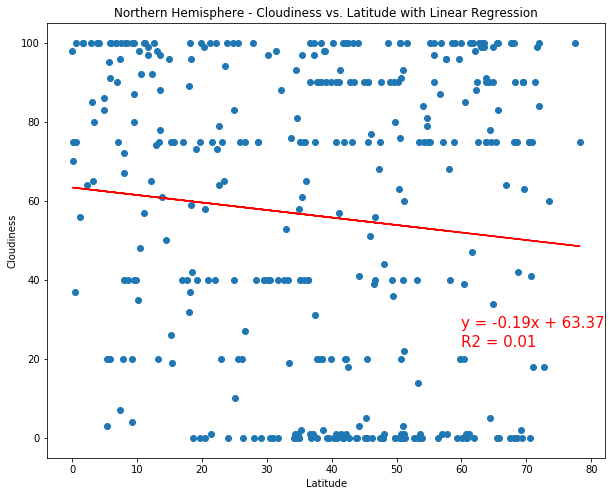

The correlation between Latitude and Cloudiness is: -0.101


In [53]:
# Northern Hemisphere - Cloudiness vs. Latitude Linear Regression

# Data for X-Axis (latitude)
northern_latitude_axis = latitude_north_df.groupby(latitude_north_df["City"])["Latitude"].mean()
northern_latitude_axis

# Data for Y-axis (Cloudiness)
northern_cloudiness_axis = latitude_north_df.groupby(latitude_north_df["City"])["Cloudiness"].mean()
northern_cloudiness_axis

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = st.linregress(northern_latitude_axis, northern_cloudiness_axis)

# Calculate the predictions for each value of x (latitude)
regression_values = nothern_latitude_axis * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot observations
plt.figure(figsize=(10,8))
plt.scatter(northern_latitude_axis, northern_cloudiness_axis)

# Plot the regression line
plt.plot(northern_latitude_axis, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (60, 28), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue**2,3)}", (60, 23), fontsize=15, color="red")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude with Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

# Calculate the correlation coefficient
correlation = round(st.pearsonr(northern_latitude_axis, northern_cloudiness_axis)[0],3)
print(f"The correlation between Latitude and Cloudiness is: {correlation}")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.011


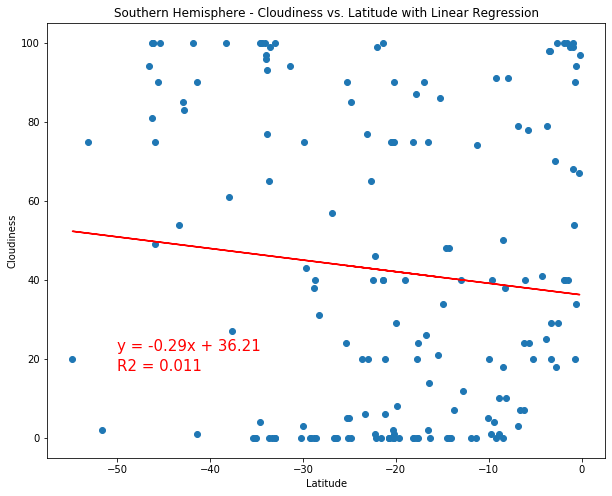

The correlation between Latitude and Cloudiness is: -0.104


In [54]:
# Southern Hemisphere - Cloudiness vs. Latitude Linear Regression

# Data for X-Axis (latitude)
southern_latitude_axis = latitude_south_df.groupby(latitude_south_df["City"])["Latitude"].mean()
southern_latitude_axis

# Data for Y-axis (Cloudiness)
southern_cloudiness_axis = latitude_south_df.groupby(latitude_south_df["City"])["Cloudiness"].mean()
southern_cloudiness_axis

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = st.linregress(southern_latitude_axis, southern_cloudiness_axis)

# Calculate the predictions for each value of x (latitude)
regression_values = southern_latitude_axis * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot observations
plt.figure(figsize=(10,8))
plt.scatter(southern_latitude_axis, southern_cloudiness_axis)

# Plot the regression line
plt.plot(southern_latitude_axis, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (-50, 22), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue**2,3)}", (-50, 17), fontsize=15, color="red")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude with Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

# Calculate the correlation coefficient
correlation = round(st.pearsonr(southern_latitude_axis, southern_cloudiness_axis)[0],3)
print(f"The correlation between Latitude and Cloudiness is: {correlation}")


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.001


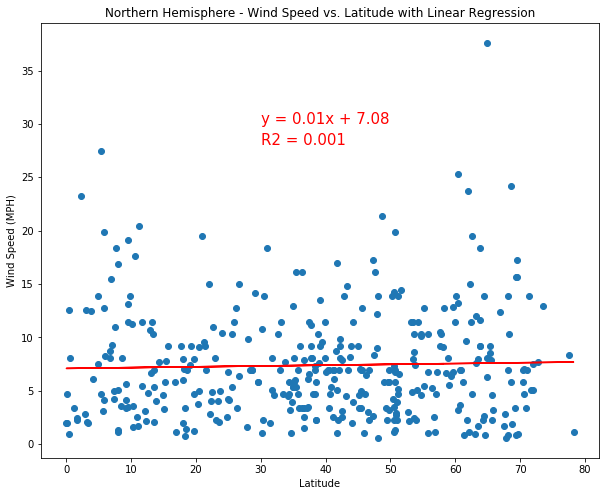

The correlation between Latitude and Wind Speed is: 0.03


In [56]:
# Northern Hemisphere - Wind Speed vs. Latitude Linear Regression

# Data for X-Axis (latitude)
northern_latitude_axis = latitude_north_df.groupby(latitude_north_df["City"])["Latitude"].mean()
northern_latitude_axis

# Data for Y-axis (Wind Speed)
northern_windspeed_axis = latitude_north_df.groupby(latitude_north_df["City"])["Wind Speed"].mean()
northern_windspeed_axis

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = st.linregress(northern_latitude_axis, northern_windspeed_axis)

# Calculate the predictions for each value of x (latitude)
regression_values = nothern_latitude_axis * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot observations
plt.figure(figsize=(10,8))
plt.scatter(northern_latitude_axis, northern_windspeed_axis)

# Plot the regression line
plt.plot(northern_latitude_axis, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (30, 30), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue**2,3)}", (30,28), fontsize=15, color="red")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude with Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

# Calculate the correlation coefficient
correlation = round(st.pearsonr(northern_latitude_axis, northern_windspeed_axis)[0],3)
print(f"The correlation between Latitude and Wind Speed is: {correlation}")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0


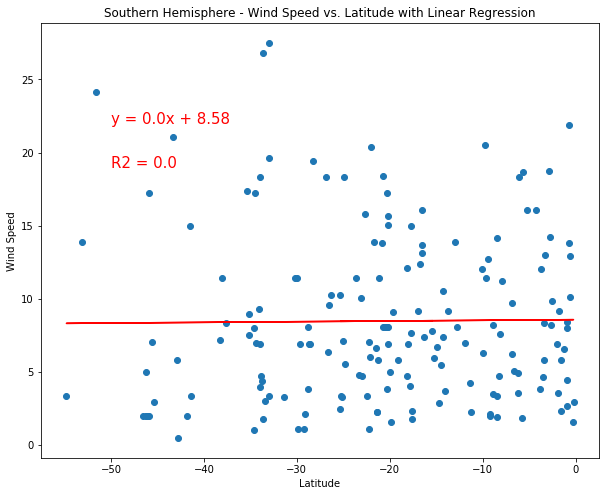

The correlation between Latitude and Wind Speed is: 0.011


In [58]:
# Southern Hemisphere - Wind Speed vs. Latitude Linear Regression

# Data for X-Axis (latitude)
southern_latitude_axis = latitude_south_df.groupby(latitude_south_df["City"])["Latitude"].mean()
southern_latitude_axis

# Data for Y-axis (Wind Speed)
southern_windspeed_axis = latitude_south_df.groupby(latitude_south_df["City"])["Wind Speed"].mean()
southern_windspeed_axis

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = st.linregress(southern_latitude_axis, southern_windspeed_axis)

# Calculate the predictions for each value of x (latitude)
regression_values = southern_latitude_axis * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot observations
plt.figure(figsize=(10,8))
plt.scatter(southern_latitude_axis, southern_windspeed_axis)

# Plot the regression line
plt.plot(southern_latitude_axis, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (-50, 22), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue**2,3)}", (-50, 19), fontsize=15, color="red")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude with Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

# Calculate the correlation coefficient
correlation = round(st.pearsonr(southern_latitude_axis, southern_windspeed_axis)[0],3)
print(f"The correlation between Latitude and Wind Speed is: {correlation}")


The r-value is: 0.46937863826630627


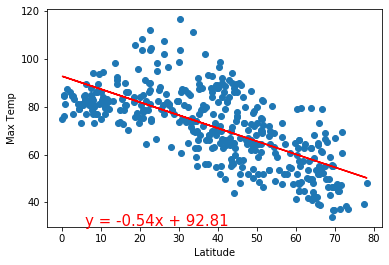

The r-value is: 0.6082708688906918


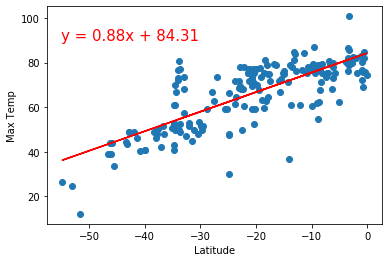

The r-value is: 0.000543987878808455


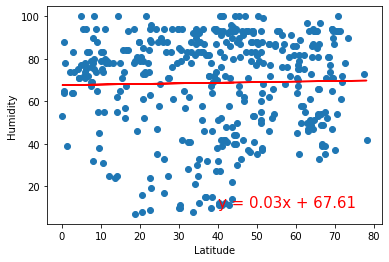

The r-value is: 0.014985174297345524


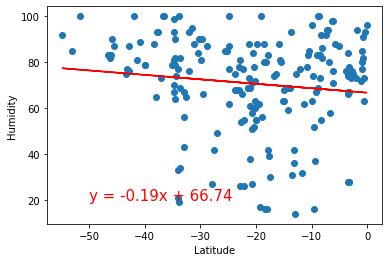

The r-value is: 0.0020898727664228514


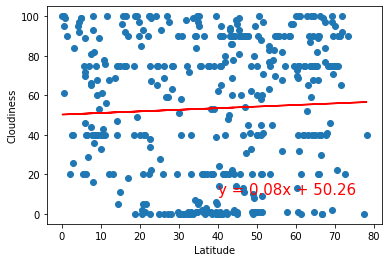

The r-value is: 0.0035263772085582894


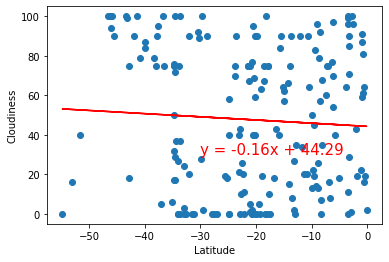

The r-value is: 0.04019723576144484


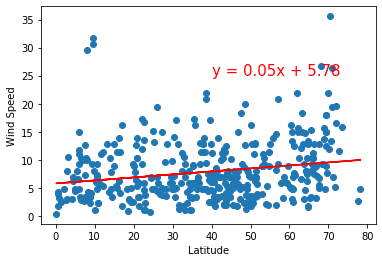

The r-value is: 0.017128274759839232


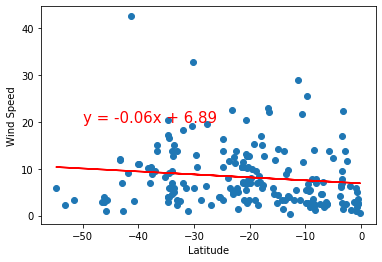